In [23]:
# import modules here
from prep_data import *
from visualizations import *
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression

In [5]:
# data files
EXPERIMENT_1 = 'data/experiment1_data.csv'
EXPERIMENT_2 = 'data/experiment2_data.csv'

# Binary Models

## Experiment 1

In [20]:
# prepare the data
mode = 3 
x_train, x_test, y_train, y_test = binary_prep(EXPERIMENT_1, mode)
class_names = ['1', '0'] # 1 means an app was opened, 0 means nothing happened

### Dummy Classifier

Let's see how accurate we are when we use a classifier that learns nothing...

             precision    recall  f1-score   support

          0       0.46      0.75      0.57         8
          1       0.33      0.12      0.18         8

avg / total       0.40      0.44      0.38        16



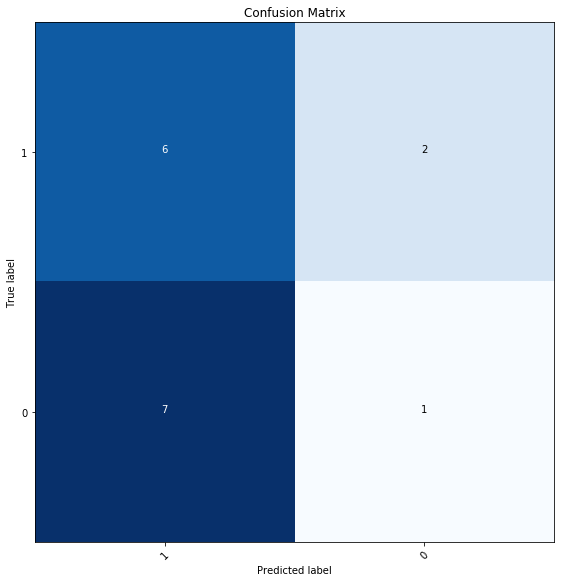

In [11]:
dummy = DummyClassifier()
dummy.fit(x_train, y_train)
# Make predictions
y_pred = dummy.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':10})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

It looks like the results are pretty bad...

### Support Vector Machine

In [21]:
# still need to do cross validation and grid search
svc = LinearSVC()
svc.fit(x_train, y_train)
joblib.dump(svc, 'saved_models/e1_svm.pkl')

['saved_models/e1_svm.pkl']

             precision    recall  f1-score   support

          0       1.00      0.88      0.93         8
          1       0.89      1.00      0.94         8

avg / total       0.94      0.94      0.94        16



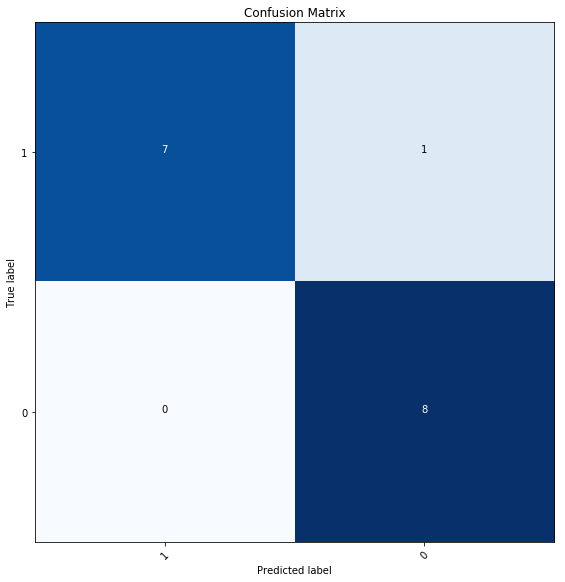

In [22]:
# Make predictions
y_pred = svc.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':10})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

### Logistic Regression

In [27]:
# still need to do cross validation and grid search
lr = LogisticRegression()
lr.fit(x_train, y_train)
joblib.dump(lr, 'saved_models/e1_lr.pkl')

['saved_models/e1_lr.pkl']

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        16



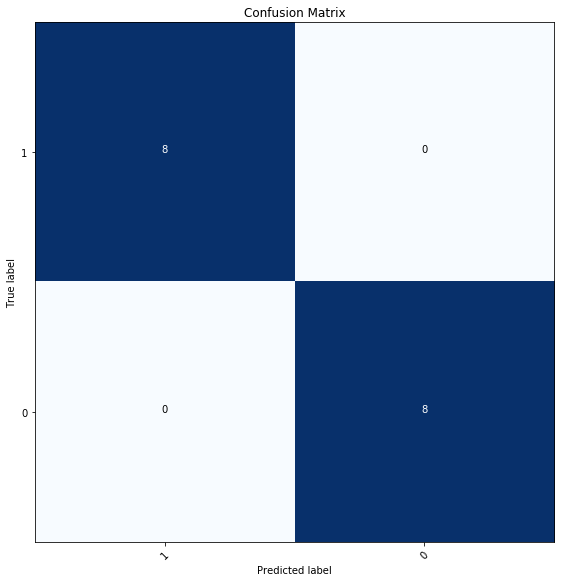

In [28]:
# Make predictions
y_pred = lr.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':10})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()